# OPERATIVE SECTION -01

In [1]:
import pandas as pd

df_1 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit_1.csv")
df_2 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit-2.csv")

print(df_1.columns)
print(df_2.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'Date', 'Time',
       'company_parts', 'merchant_fraud_rate'],
      dtype='object')
Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')


In [2]:
print(df_1['cc_num'].unique()[:10])
print(df_2['Transaction ID'].unique()[:10])


[   4425161475596168    4904681492230012     180048185037117
 4469777115158234880     370348764075623      38797410705641
    4874006077381178      36890292963032     378278619832195
    3562264947797243]
['#3577 209' '#3039 221' '#2694 780' '#2640 960' '#2771 031' '#3446 698'
 '#3652 191' '#3161 927' '#3025 809' '#3413 696']


In [3]:
df_2['Transaction ID'] = df_2['Transaction ID'].str.replace("#", "").str.replace(" ", "").astype(str)


In [4]:
df_2['Transaction ID']

0        3577209
1        3039221
2        2694780
3        2640960
4        2771031
          ...   
99995    3203892
99996    3304849
99997    3532129
99998    3107092
99999    3400711
Name: Transaction ID, Length: 100000, dtype: object

In [5]:
print(df_1[['cc_num']].head(10))
print(df_2[['Transaction ID']].head(10))


                cc_num
0     4425161475596168
1     4904681492230012
2      180048185037117
3  4469777115158234880
4      370348764075623
5       38797410705641
6     4874006077381178
7       36890292963032
8      378278619832195
9     3562264947797243
  Transaction ID
0        3577209
1        3039221
2        2694780
3        2640960
4        2771031
5        3446698
6        3652191
7        3161927
8        3025809
9        3413696


In [9]:
df_1.shape

(100000, 28)

In [10]:
df_2.shape

(100000, 16)

In [155]:
# Step 1: Drop NaN (null) values
df_2 = df_2.dropna()

# Step 2: Calculate how many more rows need to be removed
rows_to_drop = 1196675 - (1296675 - len(df_2))  # Adjust for already dropped NaN rows

# Step 3: Drop the remaining rows from the top
if rows_to_drop > 0:
    df = df_2.iloc[rows_to_drop:]

# Print final shape of the DataFrame
print("Final DataFrame shape:", df.shape)

Final DataFrame shape: (100000, 24)


In [12]:
df_1['Date'] = pd.to_datetime(df_1['trans_date_trans_time']).dt.date
df_1['Time'] = pd.to_datetime(df_1['trans_date_trans_time']).dt.time


In [14]:
df_1['category'].unique()

array(['misc_net', 'grocery_pos', 'grocery_net', 'shopping_pos',
       'shopping_net', 'gas_transport', 'misc_pos', 'food_dining',
       'entertainment', 'health_fitness', 'personal_care', 'home',
       'kids_pets', 'travel'], dtype=object)

In [15]:
df_1['merchant'] = df_1['merchant'].str.replace(r'^fraud_', '', regex=True)


In [16]:
unique_merchants = df_1['merchant'].nunique()
print(f"Number of unique merchants: {unique_merchants}")


Number of unique merchants: 693


In [17]:
fraud_counts = df_1['merchant'].value_counts()
print(fraud_counts.head(10))  # Show top 10 merchants with most fraud cases


merchant
Kilback LLC         385
Boyer PLC           291
Kuhn LLC            291
Cormier LLC         275
Schumm PLC          274
Dickinson Ltd       270
Huels-Nolan         245
Erdman-Kertzmann    241
Cummerata-Jones     238
Luettgen PLC        238
Name: count, dtype: int64


In [18]:
df_1['company_parts'] = df_1['merchant'].str.split('-|, | and | LLC| Inc| Ltd| PLC')
all_parts = df_1['company_parts'].explode()
common_parts = all_parts.value_counts()
print(common_parts.head(20))  # Show most common company name words


company_parts
             24900
Sons          5637
Goyette       1279
Friesen       1215
Kutch         1212
Koss          1178
Erdman        1056
Bahringer     1054
Conroy        1051
Reichert      1039
Kilback       1034
Koepp         1010
Weimann       1002
Bins           989
Schaefer       976
Hills          971
Harris         960
Greenholt      953
Streich        947
Bauch          944
Name: count, dtype: int64


# OPERATIVE SECTION -02

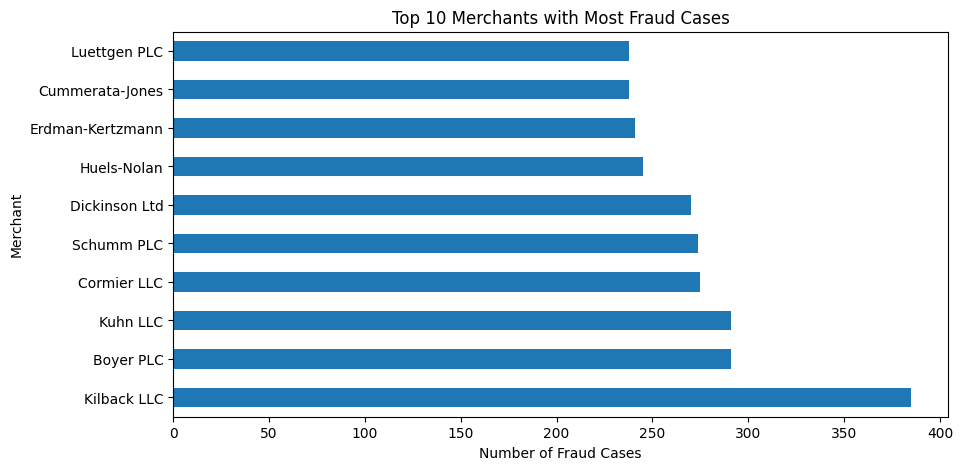

In [19]:
import matplotlib.pyplot as plt

fraud_counts.head(10).plot(kind='barh', figsize=(10, 5), title='Top 10 Merchants with Most Fraud Cases')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Merchant')
plt.show()


In [21]:
df_1['merchant'].unique()

array(['Block-Parisian', 'Osinski, Ledner and Leuschke',
       'Rodriguez, Yost and Jenkins', 'Kutch-Hegmann',
       'Willms, Kris and Bergnaum', 'Koelpin and Sons', 'DuBuque LLC',
       'Reichert, Huels and Hoppe', 'Macejkovic-Lesch', 'Marks Inc',
       'Zieme, Bode and Dooley', 'Thiel PLC',
       'Kutch, Steuber and Gerhold', 'Towne LLC',
       'Rowe, Batz and Goodwin', 'Streich, Hansen and Veum',
       'Swaniawski, Bahringer and Ledner', 'Heaney-Marquardt',
       'Dooley-Thompson', 'Roob LLC', 'Lehner, Reichert and Mills',
       'Cummerata-Jones', 'Dooley Inc', 'Durgan-Auer', 'Dibbert-Green',
       'Jenkins, Hauck and Friesen', 'Towne, Greenholt and Koepp',
       'Medhurst PLC', 'Kilback LLC', 'Kerluke Inc', 'Simonis-Prohaska',
       'Heller-Abshire', 'Schmidt and Sons', 'Parisian and Sons',
       'Hudson-Ratke', 'Torp-Labadie', 'Huels-Hahn', 'Huel-Langworth',
       'Brekke and Sons', "O'Keefe-Hudson", 'Kassulke Inc', 'Sawayn PLC',
       'Johnson, Runolfsdottir and Ma

In [22]:
merchant_fraud_rate = df_1.groupby('merchant')['is_fraud'].mean()
df_1['merchant_fraud_rate'] = df_1['merchant'].map(merchant_fraud_rate)


In [25]:
df_2 = df_2.dropna()

In [26]:
df_2.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [ ]:
df_1['Day of Week'].unique()
df_1['Type of Card'].unique()
df_1['Entry Mode'].unique()
df_1['Type of Transaction'].unique()
df_1['Merchant Group'].unique()
df_1['Country of Transaction'].unique()
df_1['Country of Residence'].unique()
df_1['Gender'].unique()

df_1['Bank'].unique()
df_1['Fraud'].unique()

# OPERATIVE SECTION -03

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define categorical columns
categorical_cols = [
    'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction',
    'Merchant Group', 'Country of Transaction', 'Country of Residence',
    'Gender', 'Bank', 'Fraud'
]

# Initialize dictionary for category mappings
category_mappings = {}

# Apply Label Encoding to categorical features safely
for col in categorical_cols:
    label_enc = LabelEncoder()
    df_2.loc[:, col] = label_enc.fit_transform(df_2[col])  # Use .loc to avoid warning

    # Save category mappings correctly
    category_mappings[col] = {category: int(encoded) for category, encoded in zip(label_enc.classes_, label_enc.transform(label_enc.classes_))}

# Save mappings to TXT in the correct format
with open("category_mappings.txt", "w", encoding="utf-8") as f:
    for col, mapping in category_mappings.items():
        f.write(f"### {col} ###\n")
        for category, encoded in mapping.items():
            f.write(f"{category}: {encoded}\n")
        f.write("\n")  # Add a newline between categories

print("Category mappings saved to category_mappings.txt ✅")


Category mappings saved to category_mappings.txt ✅


In [43]:
df_1 = df_1.iloc[:-23]


In [46]:
df_2.shape

(99977, 16)

In [47]:
df_1.to_csv("credit_updated_1.csv", index=False)

In [187]:
import pandas as pd


# Step 1: Drop NaN (null) values
df_2 = df_2.dropna()

# Step 2: Calculate how many more rows need to be removed
rows_to_drop = 1000702 - (1100702 - len(df_2))  # Adjust for already dropped NaN rows

# Step 3: Drop the remaining rows from the top
if rows_to_drop > 0:
    df_2 = df_2.iloc[rows_to_drop:]

# Print final shape of the DataFrame
print("Final DataFrame shape:", df_2.shape)


Final DataFrame shape: (100000, 28)


In [2]:
df1 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit_updated_1.csv")
df2 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit_update_2.csv")

In [5]:
df1.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode', 'Date', 'Time',
       'company_parts', 'merchant_fraud_rate'],
      dtype='object')

In [2]:
df_2["transaction_description"] = (
    df_2["Merchant Group"].astype(str) + " " +
    df_2["Type of Transaction"].astype(str) + " " +
    df_2["Type of Card"].astype(str)
)
df_2["transaction_description"] = df_2["transaction_description"].str.lower()


In [3]:
df_2['transaction_description']

0             entertainment pos visa
1            services pos mastercard
2                restaurant pos visa
3             entertainment pos visa
4            electronics online visa
                    ...             
99995     electronics pos mastercard
99996        children atm mastercard
99997    subscription atm mastercard
99998              products pos visa
99999            restaurant pos visa
Name: transaction_description, Length: 100000, dtype: object

In [4]:
df = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv")

final_df = pd.concat([df, df_2['transaction_description']], axis=1)


In [5]:
final_df.to_csv("merged_credit_data.csv", index=False)

# OPERATIVE SECTION -04

In [7]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s", force=True)

# Load the datasets
logging.info("Loading the datasets...")

df_1 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit_updated_1.csv")
df_2 = pd.read_csv("D:/Credit_Card_Spend_Analysis/data/credit_update_2.csv")

logging.info(f"Dataset 1 loaded with {df_1.shape[0]} rows and {df_1.shape[1]} columns.")
logging.info(f"Dataset 2 loaded with {df_2.shape[0]} rows and {df_2.shape[1]} columns.")

# Select relevant features from Dataset 1
df_1_selected = df_1[['trans_date_trans_time', 'amt', 'is_fraud', 'category', 'cc_num']].copy()
df_1_selected.rename(columns={'trans_date_trans_time': 'ds', 'amt': 'Amount', 'is_fraud': 'Fraud'}, inplace=True)

# Convert 'ds' to datetime
df_1_selected['ds'] = pd.to_datetime(df_1_selected['ds'], errors='coerce')

# Select relevant features from Dataset 2
df_2_selected = df_2[['Date', 'Time', 'Amount', 'Fraud', 'Merchant Group']].copy()

# Convert Date and Time to datetime
# Convert Date and Time to datetime safely
df_2_selected['ds'] = pd.to_datetime(
    df_2_selected['Date'].astype(str) + ' ' + df_2_selected['Time'].astype(str), 
    errors='coerce'
)


# Drop invalid dates (NaT)
df_2_selected = df_2_selected.dropna(subset=['ds'])

# Drop original Date and Time columns
df_2_selected.drop(columns=['Date', 'Time'], inplace=True)

# **Identify a proper merge key**
logging.info("Checking merge keys...")

common_cols = set(df_1_selected.columns).intersection(set(df_2_selected.columns))
if not common_cols:
    logging.error("No common columns found for merging! Please check your datasets.")
else:
    logging.info(f"Common columns found for merging: {common_cols}")

# **Preview 'ds' Column Before Merging**
logging.info("Previewing 'ds' column values for debugging:")
print("df_1_selected['ds'] sample:\n", df_1_selected['ds'].head())
print("df_2_selected['ds'] sample:\n", df_2_selected['ds'].head())

# **Perform the merge**
logging.info("Merging the datasets...")

df_merged = pd.merge_asof(
    df_1_selected.sort_values('ds'),
    df_2_selected.sort_values('ds'),
    on='ds',
    direction='nearest'  # Matches closest timestamp
)

# Save the merged dataset
output_path = "D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv"
df_merged.to_csv(output_path, index=False)

logging.info(f"Feature extraction and merging completed. Output saved as: {output_path}")
print(f"Feature extraction and merging completed. Output saved as: {output_path}")

# Display summary of merged data
if df_merged.empty:
    logging.warning("Merged dataset is empty! Check date formats and merge keys.")
else:
    logging.info(f"Merged dataset contains {df_merged.shape[0]} rows and {df_merged.shape[1]} columns.")


2025-02-15 05:12:41,279 - INFO - Loading the datasets...
2025-02-15 05:12:42,858 - INFO - Dataset 1 loaded with 99977 rows and 28 columns.
2025-02-15 05:12:42,860 - INFO - Dataset 2 loaded with 99977 rows and 16 columns.
C:\Users\Subhan\AppData\Local\Temp\ipykernel_4392\2335238837.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2_selected['ds'] = pd.to_datetime(
2025-02-15 05:12:43,106 - INFO - Checking merge keys...
2025-02-15 05:12:43,106 - INFO - Common columns found for merging: {'Amount', 'Fraud', 'ds'}
2025-02-15 05:12:43,106 - INFO - Previewing 'ds' column values for debugging:
2025-02-15 05:12:43,114 - INFO - Merging the datasets...


df_1_selected['ds'] sample:
 0   2020-05-07 04:17:21
1   2020-05-07 04:17:43
2   2020-05-07 04:19:10
3   2020-05-07 04:19:11
4   2020-05-07 04:21:53
Name: ds, dtype: datetime64[ns]
df_2_selected['ds'] sample:
 0   2020-10-14 19:00:00
1   2020-10-14 17:00:00
2   2020-10-14 14:00:00
3   2020-10-13 14:00:00
4   2020-10-13 23:00:00
Name: ds, dtype: datetime64[ns]


2025-02-15 05:12:43,895 - INFO - Feature extraction and merging completed. Output saved as: D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv
2025-02-15 05:12:43,895 - INFO - Merged dataset contains 99977 rows and 8 columns.


Feature extraction and merging completed. Output saved as: D:/Credit_Card_Spend_Analysis/data/merged_credit_data.csv
